# Case Study 03
Navaneeth R

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# Fetching Data And Checking for Null Values

In [3]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# Finding Correlatin Between Each Given Parameter 

<AxesSubplot:>

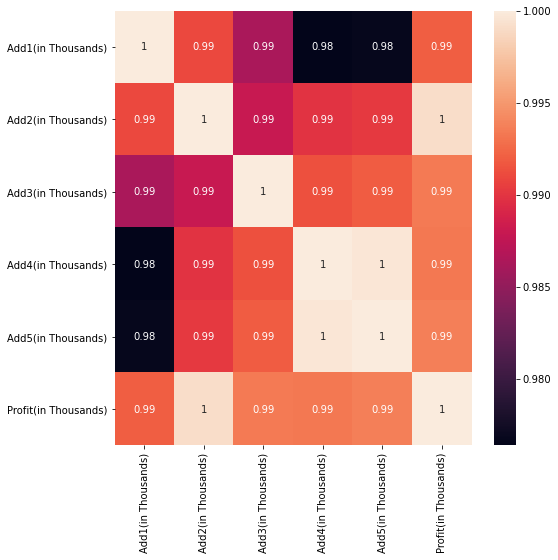

In [5]:
cor=data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(cor,annot=True)

In [59]:
# Its a highly correlated dataset, with a high positive correlation between each parameter.
#For feature reduction for creating the model, we discard the parameter Add5

In [38]:
data1=data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Profit(in Thousands)']]
data1.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,4093.065
1,217.00,218.60,205.90,210.25,4042.448
2,223.50,227.80,216.15,217.25,4213.819
3,230.00,237.50,225.75,226.45,4391.665
4,234.55,234.60,221.05,230.30,4350.683


# Initialization of independent and dependent variables for the model

In [40]:
y=data1['Profit(in Thousands)']
x=data1[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)']]

# Creating the model

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lreg=linear_model.LinearRegression()
model=lreg.fit(x_train,y_train)
pred=model.predict(x_test)
print(y_test)
print(pred)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
[4150.88763487 4447.12592965 5133.38031159 4908.26829527 5002.14153915
 4624.18120031 5383.91839828 5328.00021054 5175.589147

In [ ]:
#One can verify the profits and the predicated profits

# To find the the Mean Squared Error

In [66]:
print('The Mean Squared Error value is', mean_squared_error(y_test,pred))

The Mean Squared Error value is 0.538164044375497


In [ ]:
#The mean squared error value is low, signifying the accuaracy of the model

# To predict a profit for a given add values using the model

In [69]:
xval=[[290,312,309,298]]
pred1=model.predict(xval)
print('The predicated profit using the model is',*pred1)

The predicated profit using the model is 5801.736693174623
